In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
import numpy as np

In [3]:
sim = tq.Simulator().add_readout_error(0.01)
circuit = tq.Circuit({range(5): tq.Meas()})
sim.run(circuit, n_shots=1000)
circuit.results

Results({'00000': 951, '00001': 11, '00010': 6, '00100': 12, '01000': 6, '10000': 14})

In [4]:
sim = tq.Simulator().add_readout_error(0.01, {1: 0.5})
circuit = tq.Circuit({range(5): tq.Meas()})
sim.run(circuit, n_shots=1000)
circuit.results

Results({'00000': 485, '00001': 7, '00010': 5, '10000': 7, '01000': 475, '01001': 4, '01010': 3, '01100': 7, '01110': 1, '11000': 6})

In [5]:
sim = tq.Simulator().add_readout_error(0.01, {1: 0.05, 3: [0.01, 0.07]})
circuit = tq.Circuit({range(5): tq.Meas()})
sim.run(circuit, n_shots=1000)
circuit.results

Results({'00000': 918, '00001': 8, '00100': 16, '10000': 10, '00010': 6, '01000': 42})

In [6]:
sim = tq.Simulator().add_readout_error([[0.98, 0.06], [0.01, 0.9], [0.01, 0.04]])
circuit = tq.Circuit({range(5): tq.Meas()})
sim.run(circuit, n_shots=1000)
circuit.results

Results({'00000': 909, '00001': 7, '00002': 4, '00010': 8, '00020': 7, '00100': 10, '00102': 1, '00200': 9, '01000': 8, '01020': 1, '02000': 9, '10000': 9, '10010': 1, '20000': 14, '20002': 1, '20010': 2}, dim=3)

In [7]:
confusion_mat = [
    [0.99, 0.05, 0.00, 0.00],
    [0.00, 0.90, 0.00, 0.02],
    [0.00, 0.05, 0.96, 0.00],
    [0.01, 0.00, 0.04, 0.98],
]
sim = tq.Simulator().add_readout_error(0, {(2, 3): confusion_mat})
circuit = tq.Circuit({range(5): tq.Meas()})
sim.run(circuit, n_shots=10000)
circuit.results

Results({'00000': 9914, '00110': 86})

In [8]:
# Define a set of ideal POVM operators for each subsystem
proj0 = np.array([[1, 0], [0, 0]])  # project onto this one to get a "0"
proj1 = np.array([[0, 0], [0, 1]])  # project onto this one to get a "1"
ideal = np.array([proj0, proj1])

# Define a unitary rotation about X by 20 degrees
u = tq.Gate.from_generators("X", 20).mat

# Define noisy POVM operators by rotating the ideal POVM operators by U, which
# coherently changes the basis of the measurement
twisted_povm = [u @ x @ u.conj().T for x in ideal]

# initialize a simulator with the above POVM applied to qubit 3
sim = tq.Simulator().add_readout_error(0, {3: twisted_povm})
circuit = tq.Circuit({range(5): tq.Meas()})
sim.run(circuit, n_shots=1000)
circuit.results

Results({'00000': 980, '00010': 20})

In [9]:
povm = [np.diag([0.99, 0.05]), np.diag([0, 0.7]), np.diag([0.01, 0.25])]
sim = tq.Simulator().add_readout_error(povm)
circuit = tq.Circuit([{1: tq.Gate.h}, {(0, 1): tq.Meas()}])
sim.run(circuit, n_shots=10000)
circuit.results

Results({'00': 5159, '20': 55, '01': 3434, '21': 47, '02': 1287, '22': 18}, dim=3)

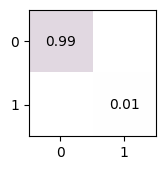

In [10]:
sim = tq.Simulator().add_prep(0.01)
circuit = tq.Circuit([{0: tq.Prep()}])
tq.plot_mat(sim.state(circuit).mat())

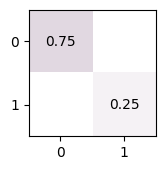

In [11]:
sim = tq.Simulator().add_prep([[0.75, 0], [0, 0.25]])
circuit = tq.Circuit([{0: tq.Prep()}])
tq.plot_mat(sim.state(circuit).mat())

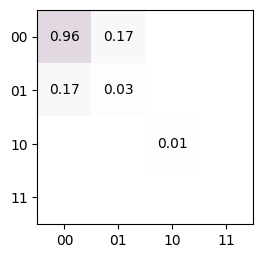

In [12]:
u = tq.Gate.from_generators("Y", 20).mat
sim = tq.Simulator().add_prep(0.01, {3: u @ np.diag([1, 0]) @ u.conj().T})
circuit = tq.Circuit([{0: tq.Prep(), 3: tq.Prep()}])
tq.plot_mat(sim.state(circuit).mat())

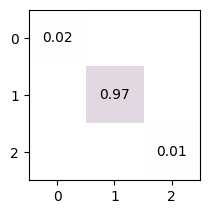

In [13]:
sim = tq.Simulator().add_prep(np.diag([0.97, 0.02, 0.01]))
circuit = tq.Circuit([{0: tq.Prep()}, {0: tq.Gate.x}])
tq.plot_mat(sim.state(circuit).mat())